In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [7]:
df.drop('loan_id', axis = 1, inplace = True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
df_obj = [' education', ' self_employed']

In [11]:
# converting categorical variables
for col in df_obj:
    df[col] = le.fit_transform(df[col])

In [12]:
df[' loan_status'] = df[' loan_status'].map({' Approved': 1, ' Rejected': 0})
# Approved = 1, Rejected = 0

In [13]:
df.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0


In [15]:
df_num = [' no_of_dependents', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']

In [16]:

# Standardization
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [17]:
for col in df_num:
    df[col] = scale.fit_transform(df[[col]])

In [18]:
df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0


In [19]:
# feature and target segregation
x = df.drop(' loan_status', axis = 1)
y = df[' loan_status']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=df[' loan_status'], test_size=0.2, random_state=42)

In [22]:
x_train.shape, x_test.shape

((3415, 11), (854, 11))

In [23]:
# defining the architecture of the model
import keras
import tensorflow as tf

In [24]:
#importing the sequential model - No of layers and no of Neurons
from keras.models import Sequential

In [25]:
# Input layers and Hidden Layers
from keras.layers import InputLayer, Dense

In [26]:
x_train.shape

(3415, 11)

In [27]:
x_train.shape[1]

11

In [28]:
# defining i/p neurons
input_neurons = x_train.shape[1]

In [29]:
# No of O/P neurons
# Binary classification 0 or 1

output_neurons = 1

In [30]:
# Setting the No of hidden layers
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [31]:
# Activation function
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units = neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units = neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units = output_neurons, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
# no of params between i/p  and first hidden layer
input_neurons*neuron_hidden_layer_1

110

In [34]:
# adding the bias for each neuron in first hidden layer(10*1)
input_neurons*neuron_hidden_layer_1 + 10

120

In [35]:
# Compiling the Model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
#Training the model
model_history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs = 50)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6081 - loss: 0.6912 - val_accuracy: 0.6218 - val_loss: 0.6355
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6245 - loss: 0.6223 - val_accuracy: 0.6206 - val_loss: 0.5851
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6144 - loss: 0.5773 - val_accuracy: 0.6323 - val_loss: 0.5151
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.4961 - val_accuracy: 0.8009 - val_loss: 0.4243
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8198 - loss: 0.4058 - val_accuracy: 0.8864 - val_loss: 0.3361
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8946 - loss: 0.3267 - val_accuracy: 0.8946 - val_loss: 0.2776
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9024 - loss: 0.2883 - val_accuracy: 0.9262 - val_loss: 0.2401
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9202 - loss: 0.2511 - val_accuracy: 0

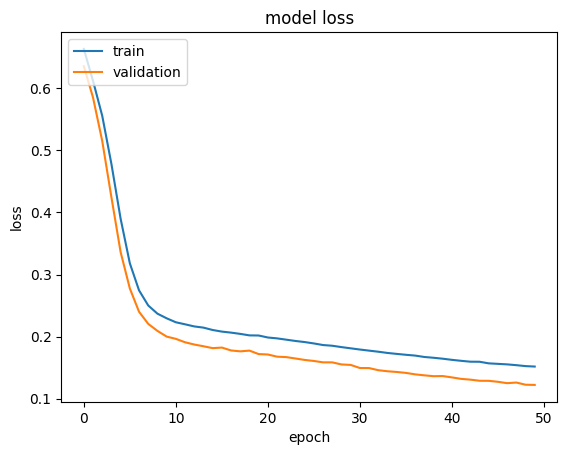

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

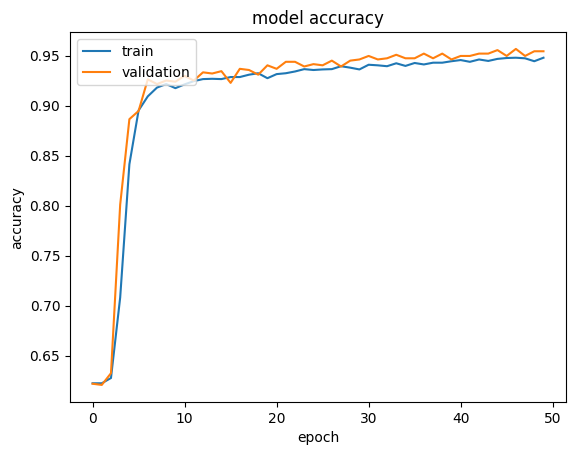

In [38]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()